Title: My Title  
Authors :   
- Roland DUTAUZIET  
- Maeva N'GUESSAN  

## Configuration du chemin 

In [ ]:
import os, sys
os.chdir(os.path.dirname(os.path.abspath(__file__))) if "__file__" in locals() else None
sys.path.append(os.path.abspath("C:/Users/maeva/OneDrive/Alternance/cours_MOSEF/TP1_MaevaRoland/MoSEF-Applied-ML"))


In [ ]:
from src.analyse_exploratoire import taux_missing_values_nb, taux_missing_values, is_outlier

## Librairies

In [ ]:
import numpy as np
import pandas as pd


import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

import random 
from tqdm.auto import tqdm

import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [65]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder  

import torch
import torch.nn as nn

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

<hr>
<h2>Description</h2>
<p>Le jeu de données contenu dans train.csv décrit des candidatures au poste de
chercheur d’or chez OrFée.<br>

<p>Le jeu de données comporte 12 colonnes :<br>
• <b>id</b>  : identifiant unique de chaque ligne<br>
• <b>date</b>  : date de la candidature<br>
•  <b>age</b>: âge du candidat<br>
•  <b>diplome</b>: plus haut diplôme obtenu (bac, licence, master, doctorat)<br>
• <b>specialite</b> : spécialité du diplôme (géologie, forage, détective, archéologie, . . . )<br>
• <b>salaire</b>: salaire demandé<br>
• <b>dispo</b>: oui : disponibilité immédiate, non : pas disponible immédiatement<br>
• <b>sexe</b>: féminin (F) ou masculin (M)<br>
• <b>exp</b> : nombre d’années d’expérience<br>
• <b>cheveux</b> : couleur des cheveux (châtain, brun, blond, roux)<br>
• <b>note</b> : note (sur 100) obtenue à l’exercice de recherche d’or<br>
• <b>embauche</b> : le candidat a-t-il été embauché ? (0 : non, 1 : oui) <br>

## Load Dataset

In [66]:
df = pd.read_csv(r'../data/data.csv',sep=',') #On change ici le sépérateur pour mieux afficher les données. En ajoutant le point virgule.
df.shape

(20000, 11)

In [67]:
df.sample(5)  # Affiche 5 lignes aléatoires du dataset

,date,cheveux,age,exp,salaire,sexe,diplome,specialite,note,dispo,embauche
11821,11/11/2013,brun,29.0,8.0,29692.0,M,master,forage,74.31,non,0
2812,09/01/2012,brun,25.0,13.0,28823.0,M,master,geologie,101.54,non,0
18542,01/02/2013,chatain,27.0,13.0,34687.0,F,master,geologie,59.72,non,0
10751,24/11/2010,blond,38.0,9.0,40053.0,M,licence,geologie,81.36,non,0
3399,22/08/2013,chatain,50.0,11.0,39784.0,F,licence,geologie,68.44,non,0


On remarque qu'il n'y a pas de colonne id. On va la créer à partir de l'index

In [68]:
df = df.reset_index().rename(columns={'index': 'id'})
df.head()

,id,date,cheveux,age,exp,salaire,sexe,diplome,specialite,note,dispo,embauche
0,0,02/06/2012,roux,25.0,9.0,26803.0,F,licence,geologie,97.08,non,0
1,1,21/04/2011,blond,35.0,13.0,38166.0,M,licence,forage,63.86,non,0
2,2,07/09/2012,blond,29.0,13.0,35207.0,M,licence,geologie,78.50,non,0
3,3,01/07/2011,brun,NaN,12.0,32442.0,M,licence,geologie,45.09,non,0
4,4,07/08/2012,roux,35.0,6.0,28533.0,F,licence,detective,81.91,non,0


In [69]:
df.columns

Index(['id', 'date', 'cheveux', 'age', 'exp', 'salaire', 'sexe', 'diplome',
       'specialite', 'note', 'dispo', 'embauche'],
      dtype='object')

# <span style="color:#011C5D">Analyse descriptive </span>

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          20000 non-null  int64  
 1   date        19909 non-null  object 
 2   cheveux     19895 non-null  object 
 3   age         19909 non-null  object 
 4   exp         19904 non-null  object 
 5   salaire     19905 non-null  object 
 6   sexe        19900 non-null  object 
 7   diplome     19891 non-null  object 
 8   specialite  19907 non-null  object 
 9   note        19886 non-null  float64
 10  dispo       19894 non-null  object 
 11  embauche    20000 non-null  int64  
dtypes: float64(1), int64(2), object(9)
memory usage: 1.8+ MB


On voit qu'il y a 12 variables et 20000 lignes. 
Il y a des missing values pour toutes les variables sauf ID et embauche.

### <span style="color:#011C5D">1. Identifier les variables numeriques et categorielles </span>

In [71]:
# EXERCICE : 

# Identifions tout d'abord les colonnes catégorielles
col_categoricals = ['cheveux', 'sexe', 'diplome',
       'specialite', 'dispo', 'embauche']

# Puis les numériques
col_numericals = ['age', 'exp', 'salaire', 'note']
# 'date' n'est pas pris en compte car il faudrait le transformer en datetime

print(f"Liste des colonnes catégorielles :\n{col_categoricals}")
print(f"\nListe des colonnes numériques :\n{col_numericals}")

Liste des colonnes catégorielles :
['cheveux', 'sexe', 'diplome', 'specialite', 'dispo', 'embauche']

Liste des colonnes numériques :
['age', 'exp', 'salaire', 'note']


In [72]:
df1 = df.copy()
df1.head()

,id,date,cheveux,age,exp,salaire,sexe,diplome,specialite,note,dispo,embauche
0,0,02/06/2012,roux,25.0,9.0,26803.0,F,licence,geologie,97.08,non,0
1,1,21/04/2011,blond,35.0,13.0,38166.0,M,licence,forage,63.86,non,0
2,2,07/09/2012,blond,29.0,13.0,35207.0,M,licence,geologie,78.50,non,0
3,3,01/07/2011,brun,NaN,12.0,32442.0,M,licence,geologie,45.09,non,0
4,4,07/08/2012,roux,35.0,6.0,28533.0,F,licence,detective,81.91,non,0


On créer une boucle pour remplacer les valeurs vides ou espaces par des NaN et ensuite convertir en float

In [73]:
# Convertir les données numerique au bon format "SI BESOIN"
#### CODEZ-ICI ####
for col in col_numericals:
    df1[col] = df1[col].replace(['', ' '], np.nan).astype(float)

In [74]:
df1.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          20000 non-null  int64  
 1   date        19909 non-null  object 
 2   cheveux     19895 non-null  object 
 3   age         19899 non-null  float64
 4   exp         19894 non-null  float64
 5   salaire     19895 non-null  float64
 6   sexe        19900 non-null  object 
 7   diplome     19891 non-null  object 
 8   specialite  19907 non-null  object 
 9   note        19886 non-null  float64
 10  dispo       19894 non-null  object 
 11  embauche    20000 non-null  int64  
dtypes: float64(4), int64(2), object(6)
memory usage: 1.8+ MB


On voit que les colonnes numériques sont bien en float maintenant.

In [75]:
df1['date']= pd.to_datetime(df1['date'], format='%d/%m/%Y')
df1.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          20000 non-null  int64         
 1   date        19909 non-null  datetime64[ns]
 2   cheveux     19895 non-null  object        
 3   age         19899 non-null  float64       
 4   exp         19894 non-null  float64       
 5   salaire     19895 non-null  float64       
 6   sexe        19900 non-null  object        
 7   diplome     19891 non-null  object        
 8   specialite  19907 non-null  object        
 9   note        19886 non-null  float64       
 10  dispo       19894 non-null  object        
 11  embauche    20000 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(5)
memory usage: 1.8+ MB


On voit que la colonne date est bien en datetime maintenant.

### <span style="color:#011C5D">2. Analyse de la distribution des variables numeriques </span>

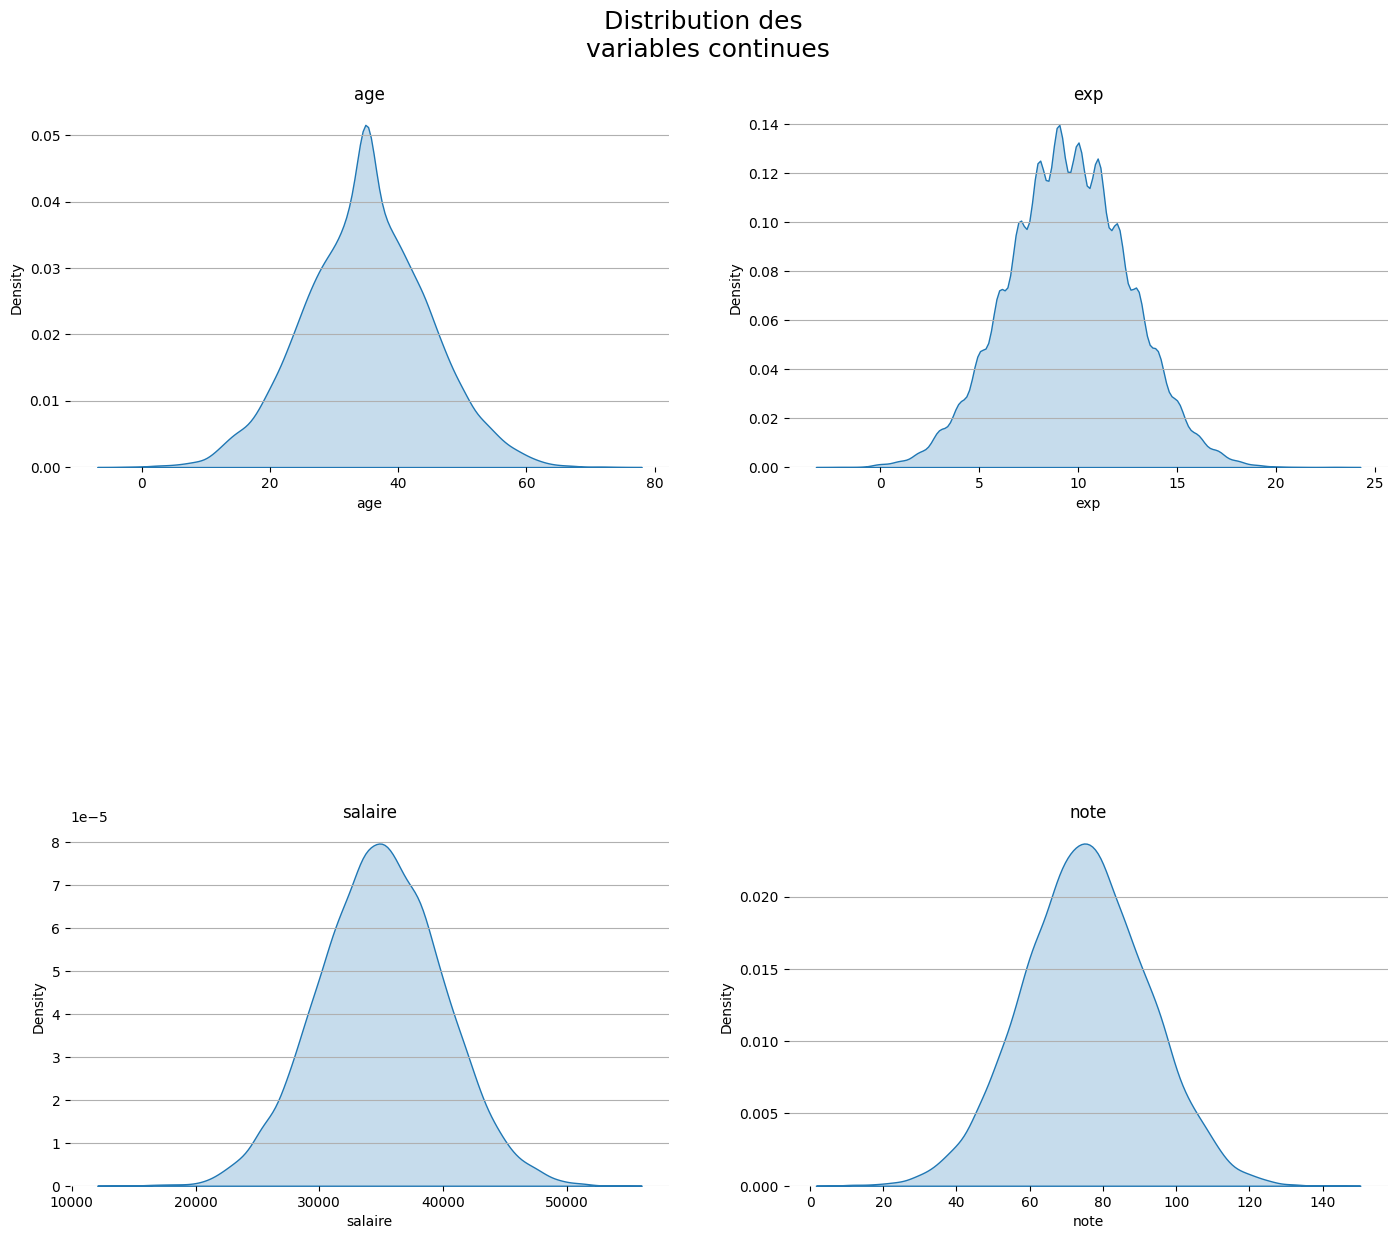

In [76]:
ncols = 2
nrows = len(col_numericals) // ncols + (len(col_numericals) % ncols > 0)
 
plt.figure(figsize=(17, 14))
plt.subplots_adjust(hspace=1)
plt.suptitle("Distribution des \nvariables continues", fontsize=18, y=0.95)
 
for n, variable in enumerate(col_numericals):
    # add a new subplot iteratively
    ax = plt.subplot(nrows, ncols, n + 1)
 
    sns.kdeplot(ax=ax, data=df1[variable], legend=None, shade=True)
    ax.grid(visible=True, which='major', axis='y') 
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    ax.set_title(variable, loc= 'center', fontsize=12)



#### Analyse

- On constate que les distributions ont plutot une forme normale.  
- Cependant, on remarque que la variable expérience a une distribution un peu différente avec des pics entre 8 et 12 ans d'expérience.

### <span style="color:#011C5D">3. Matrice de correlation </span>

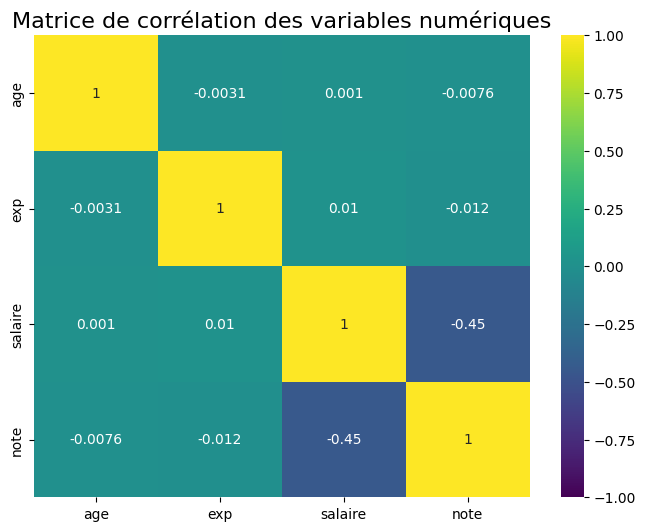

In [77]:
# EXERCICE : 

# Calculer la correlation entre les variables numeriques

matrice_corr = df1[col_numericals].corr() # On calcule la matrice de corrélation entre les variables numériques

# Afficher un heatmap de la matrice de correlation 

plt.figure(figsize=(8, 6))
sns.heatmap(matrice_corr, annot=True, cmap='viridis', vmin=-1, vmax=1)
plt.title("Matrice de corrélation des variables numériques", fontsize=16)
plt.show() 

# Que pouvez-vous conclure ?

### <span style="color:#011C5D">4. Identification des valeurs manquantes </span>

In [79]:
# EXERCICE : Laissez libre court à votre créativité et créez une fonction qui affiche le taux
#            de valeurs manquantes de chaque variable pour chaque type (catégorielle et numérique)
#            par ordre décroissant

 
taux_missing_values(df1)



Taux de valeurs manquantes par variable :
note          0.570
diplome       0.545
exp           0.530
dispo         0.530
salaire       0.525
cheveux       0.525
age           0.505
sexe          0.500
specialite    0.465
date          0.455
dtype: float64


#### Que pouvez-vous conclure ?

On remarque que hormis id et embauche, les autres variables ont des valeurs manquantes à hauteur de 50% environ.

### <span style="color:#011C5D">5. Imputation des valeurs manquantes </span>

#### <span style="color:#011C5D">5.1 Variables numeriques </span>

##### <span style="color:#011C5D">5.1.1 Imputation par la moyenne </span>

In [80]:
# EXERCICE : Imputation des variables numériques avec la moyenne
# Les variables imputées sont enregistrées dans de nouvelles colonnes.

for col in col_numericals:  
    df1[f'{col}_imputed_mean'] = df1[col].fillna(df1[col].mean())
# On crée une nouvelle colonne pour chaque variable numérique


In [81]:
df1[['age', 'exp', 'salaire', 'note']].describe()

,age,exp,salaire,note
count,19899.000000,19894.000000,19895.000000,19886.000000
mean,35.004473,9.498794,34975.703443,75.168762
std,9.609154,3.011427,5003.151060,17.095926
min,-3.000000,-2.000000,14128.000000,8.680000
25%,29.000000,7.000000,31597.000000,63.720000
50%,35.000000,9.000000,34979.000000,75.080000
75%,41.000000,12.000000,38361.000000,86.617500
max,74.000000,23.000000,53977.000000,143.220000


In [82]:
df1[['age_imputed_mean', 'exp_imputed_mean', 'salaire_imputed_mean', 'note_imputed_mean']].describe()

,age_imputed_mean,exp_imputed_mean,salaire_imputed_mean,note_imputed_mean
count,20000.000000,20000.000000,20000.000000,20000.000000
mean,35.004473,9.498794,34975.703443,75.168762
std,9.584859,3.003435,4989.999847,17.047131
min,-3.000000,-2.000000,14128.000000,8.680000
25%,29.000000,7.000000,31620.750000,63.807500
50%,35.000000,9.000000,34975.703443,75.168762
75%,41.000000,12.000000,38345.250000,86.550000
max,74.000000,23.000000,53977.000000,143.220000


##### <span style="color:#011C5D">5.1.2 Imputation par la regression </span>

In [83]:
taux_missing_values(df1)

Taux de valeurs manquantes par variable :
note          0.570
diplome       0.545
exp           0.530
dispo         0.530
salaire       0.525
cheveux       0.525
age           0.505
sexe          0.500
specialite    0.465
date          0.455
dtype: float64


In [84]:
df1_train = df1[df1[col].notnull()]
df1_missing = df1[df1[col].isnull()]

In [85]:
df1_train.shape
df1_missing.shape

(114, 16)

In [22]:
#EXERCICE : Imputation par régression
# Laissez libre cours à votre créativité !
# Pour chaque variable numérique contenant des valeurs manquantes, utilisez les variables explicatives appropriées afin d’imputer les valeurs manquantes à l’aide d’une méthode de régression.

# On peut utiliser par exemple la régression linéaire pour imputer les valeurs manquantes 
# On devrait faire la regression en fonction des variables correlées
# Imputation par régression linéaire
for col in col_numericals:
    if df1[col].isnull().sum() > 0:
        # 2 ensembles avec et sans valeurs manquantes
        df1_train = df1[df1[col].notnull()]
        df1_missing = df1[df1[col].isnull()]

        # Regression de chaque variable numérique sur les autres variables numériques
        X = df1_train[col_numericals].drop(columns=[col])
        y = df1_train[col]
        
        # Split train et de test et entraînement du modèle
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        model = LinearRegression()
        model.fit(X_train, y_train)
        
        # Évaluation du modèle
        y_pred = model.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        print(f'RMSE for {col}: {rmse}')
        
        # Imputer les valeurs manquantes
        X_missing = df1_missing[col_numericals].drop(columns=[col])
        df1.loc[df1[col].isnull(), col] = model.predict(X_missing)


ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

##### <span style="color:#011C5D">5.1.3 Comparer la distribution des variables imputer </span>

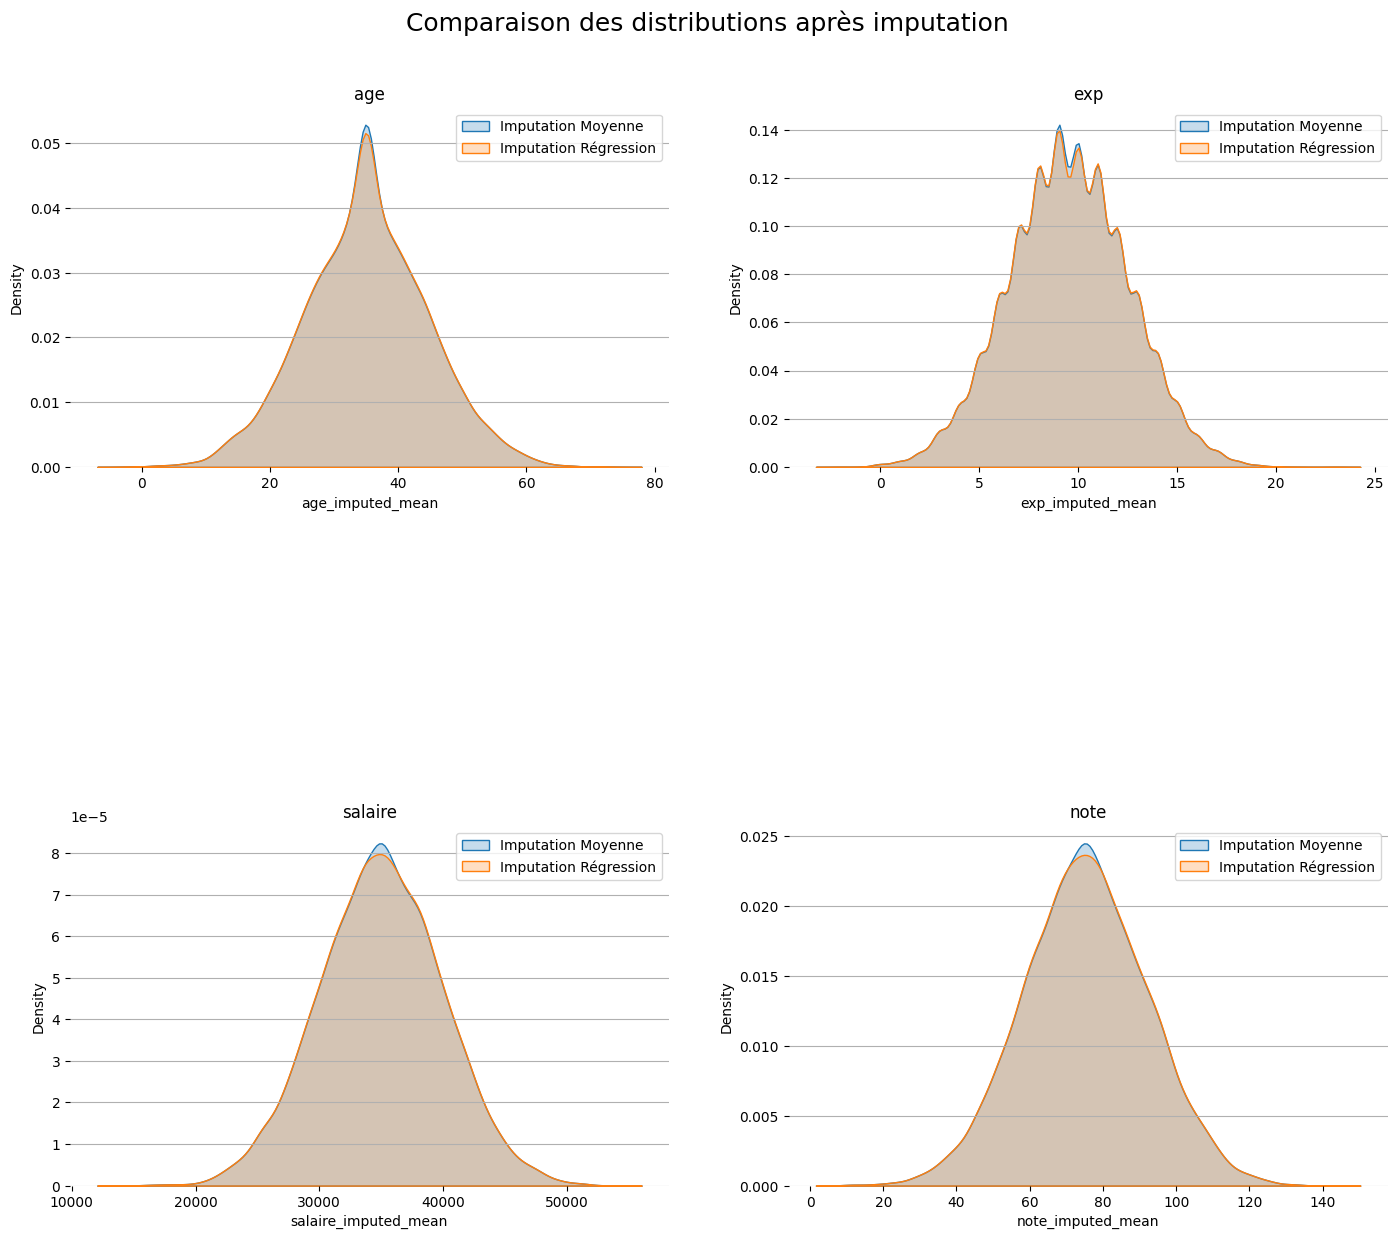

In [86]:
# EXERCICE : Laissez libre court à votre créativité 
# Pour chaque variable numerique
# Comparer la distribution entre l'imputation par la moyenne et l'imputation par Regression

ncols = 2
nrows = len(col_numericals) // ncols + (len(col_numericals) % ncols > 0)
plt.figure(figsize=(17, 14))
plt.subplots_adjust(hspace=1)
plt.suptitle("Comparaison des distributions après imputation", fontsize=18, y=0.95)
for n, variable in enumerate(col_numericals):
    
    ax = plt.subplot(nrows, ncols, n + 1)

    sns.kdeplot(ax=ax, data=df1[f'{variable}_imputed_mean'], label='Imputation Moyenne', shade=True)
    sns.kdeplot(ax=ax, data=df1[variable], label='Imputation Régression', shade=True)
    
    ax.grid(visible=True, which='major', axis='y') 
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    ax.set_title(variable, loc= 'center', fontsize=12)
    ax.legend()
    


#### Que pouvez-vous conclure ?

On remarque que les distributions après imputation par régression sont plus proches des distributions initiales que celles obtenues par imputation par la moyenne.

#### <span style="color:#011C5D">5.2 Variables categorielles </span>

In [87]:
# EXERCICE : Utiliser une methode adequate pour imputer les variables categorielles
# Les variables imputées sont enregistrées dans de nouvelles colonnes.

for col in col_categoricals:
    df1[f'{col}_imputed_mode'] = df1[col].fillna(df1[col].mode()[0])
# On crée une nouvelle colonne pour chaque variable catégorielle



### <span style="color:#011C5D">6. Detection des outliers </span>

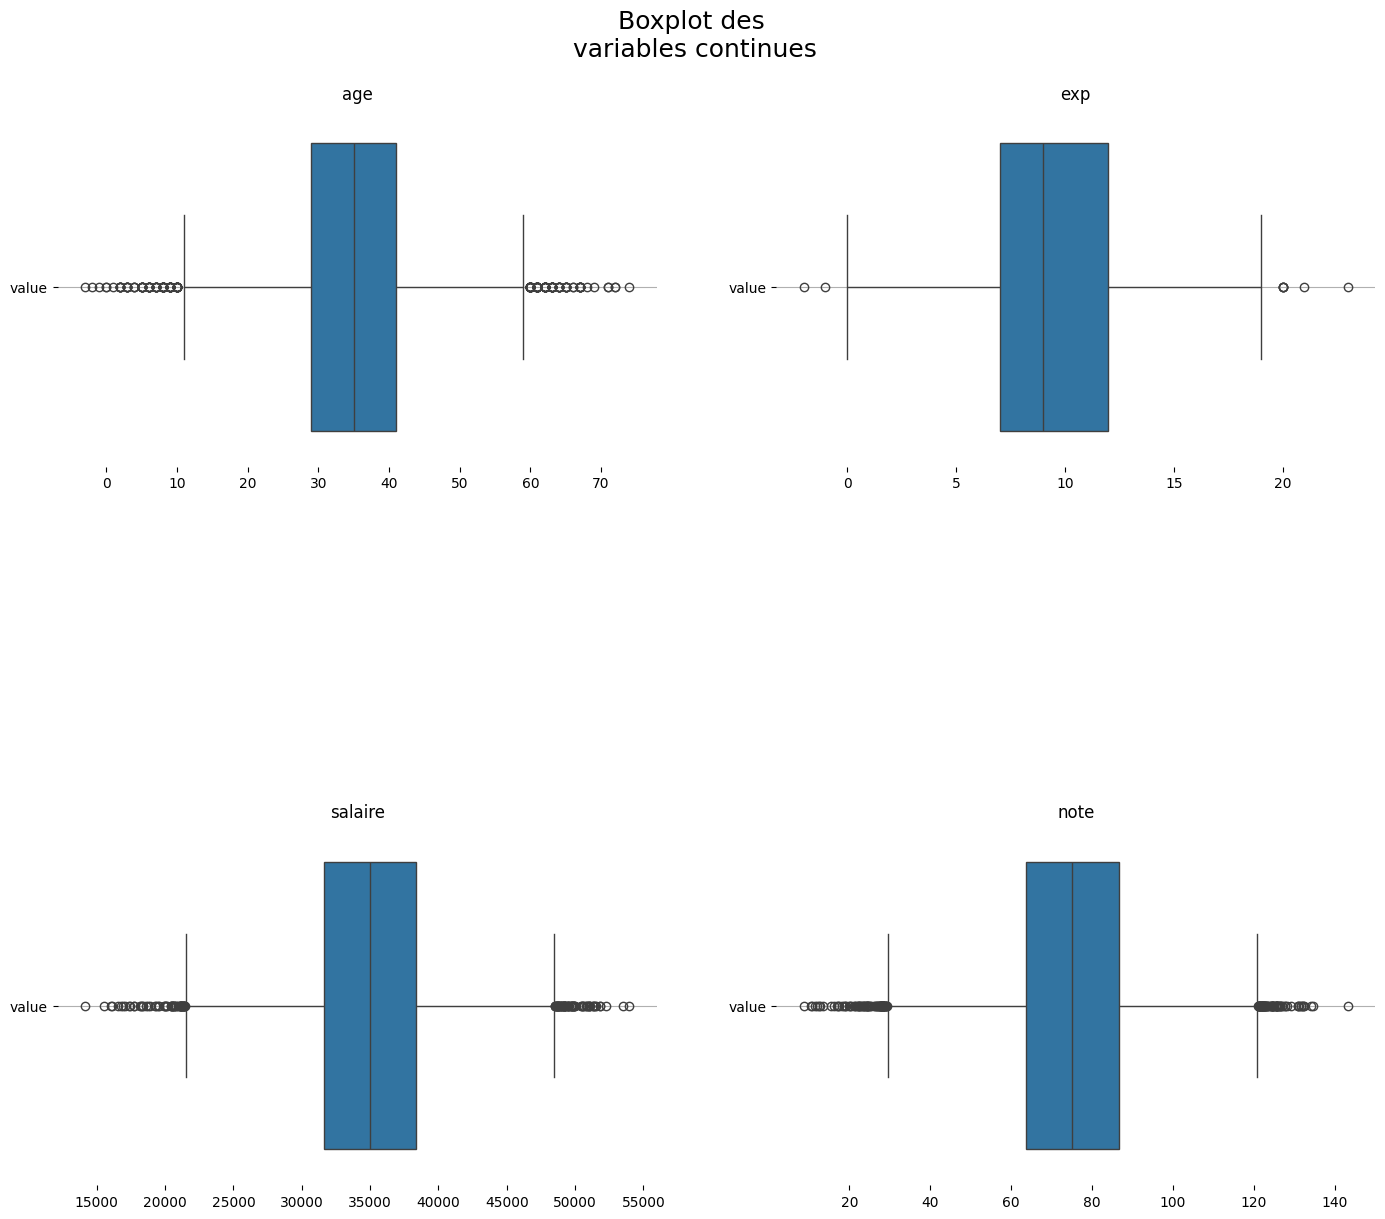

In [88]:
# On affiche les boxplots
temp=pd.melt(df1[col_numericals].reset_index(), id_vars='index', value_vars=col_numericals).iloc[:,-2:] #On change ici avec df1 car c'est le dataframe qui est nettoyé
 
ncols = 2
nrows = len(col_numericals) // ncols + (len(col_numericals) % ncols > 0)
 
plt.figure(figsize=(17, 14))
plt.subplots_adjust(hspace=1)
plt.suptitle("Boxplot des \nvariables continues", fontsize=18, y=0.95)
 
for n, variable in enumerate(col_numericals):
    # add a new subplot iteratively
    ax = plt.subplot(nrows, ncols, n + 1)
 
    sns.boxplot(ax=ax, data=temp[temp['variable']==variable], orient='h')
    #sns.kdeplot(ax=ax, data=temp[temp['variable']==variable], legend=None, palette=customPalette, shade=True)
    ax.grid(visible=True, which='major', axis='y')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    ax.set_title(variable, loc= 'center', fontsize=12)


#### Analyse

- Age : 25% de la population a moins de 28ans, la médiane est à 35 ans, et 75% de la population a moins de 42 ans.  
- Expérience : 25% de la population a moins de 6 ans d'expérience, la médiane est à 8 ans, et 25% de la population a plus de 12 ans d'expérience.  
- Salaire : 25% de la population gagne moins de 32000, la médiane est à 35.000 euros par an, et 75% de la population gagne moins de 60000. On a des outliers avec des valeurs tres elevée a plus de 50k.  
- Note : Une moitié de la population a au moins 70/100 en note et il y a des notes qui dépassent 100, ce qui est étrange.  


In [90]:
# EXERCICE : Appliquer votre fonction aux variables numeriques
for col in col_numericals:
    print(f"Outliers dans la colonne {col} :")
    print(is_outlier(df1, col).value_counts())
    print("\n")


Outliers dans la colonne age :
age
0    19785
1      215
Name: count, dtype: int64


Outliers dans la colonne exp :
exp
0    19992
1        8
Name: count, dtype: int64


Outliers dans la colonne salaire :
salaire
0    19877
1      123
Name: count, dtype: int64


Outliers dans la colonne note :
note
0    19851
1      149
Name: count, dtype: int64




#### Que pouvez-vous conclure ?
- On remarque qu'il y a principalement des outliers dans la colonne age, salaire et note. On peut expliquer cela par le fait que certaines personnes ont des âges très élevés (plus de 60 ans), des salaires très élevés (plus de 100k) et des notes qui dépassent 100.  
- Pour l'experience il n'y a pas beaucoup d'outliers car la majorité des personnes ont entre 0 et 20 ans d'expérience et c'est un travail dans lequel on ne trouve pas de personnes avec des expériences très élevées (chercheur d'or)  

In [91]:
# EXERCICE : Laissez libre court à votre créativité et créez une fonction qui affiche le taux et nombre
#            de valeurs manquantes de chaque variable
#            par ordre décroissant

taux_missing_values_nb(df1)



Taux de valeurs manquantes par variable :
note          0.570
diplome       0.545
exp           0.530
dispo         0.530
salaire       0.525
cheveux       0.525
age           0.505
sexe          0.500
specialite    0.465
date          0.455
dtype: float64 

Nombre de valeurs manquantes par variable :
note          114
diplome       109
exp           106
dispo         106
salaire       105
cheveux       105
age           101
sexe          100
specialite     93
date           91
dtype: int64


### <span style="color:#011C5D">7. Encodage des variables categorielles </span>

In [92]:
# EXERCICE : Utiliser une methode adequate pour encoder les variables categorielles
label_encoders = {}
for col in col_categoricals:
    le = LabelEncoder()
    df1[f'{col}_encoded'] = le.fit_transform(df1[col].astype(str))
    label_encoders[col] = le  # Stocker l'encodeur pour une utilisation future


In [93]:
df1.head()

,id,date,cheveux,age,exp,salaire,sexe,diplome,specialite,note,...,diplome_imputed_mode,specialite_imputed_mode,dispo_imputed_mode,embauche_imputed_mode,cheveux_encoded,sexe_encoded,diplome_encoded,specialite_encoded,dispo_encoded,embauche_encoded
0,0,2012-06-02,roux,25.0,9.0,26803.0,F,licence,geologie,97.08,...,licence,geologie,non,0,5,1,3,4,1,0
1,1,2011-04-21,blond,35.0,13.0,38166.0,M,licence,forage,63.86,...,licence,forage,non,0,1,2,3,3,1,0
2,2,2012-09-07,blond,29.0,13.0,35207.0,M,licence,geologie,78.50,...,licence,geologie,non,0,1,2,3,4,1,0
3,3,2011-07-01,brun,NaN,12.0,32442.0,M,licence,geologie,45.09,...,licence,geologie,non,0,2,2,3,4,1,0
4,4,2012-08-07,roux,35.0,6.0,28533.0,F,licence,detective,81.91,...,licence,detective,non,0,5,1,3,2,1,0


### <span style="color:#011C5D">8. Encodage des variables categorielles Embedding </span>

In [94]:
# Exemple variable
VARIABLE = "cheveux"
df1[VARIABLE] = df1[VARIABLE].fillna("Missing")
MODALITE = df1[VARIABLE].unique()
NB_MODALITE = len(MODALITE)
NB_MODALITE,MODALITE

(6, array(['roux', 'blond', 'brun', 'chatain', 'Missing', ' '], dtype=object))

In [95]:
DIM_EMBEDDING = 10

In [96]:
# Exemple d'embedding avec des weights aleatoire non entraine sur une dataset
embedding = nn.Embedding(NB_MODALITE, DIM_EMBEDDING)

In [97]:
# On encode la variable
df1[VARIABLE+"_label_encoded"] = LabelEncoder().fit_transform(df[VARIABLE])


In [98]:
# On affiche le resultat
df1[[VARIABLE,VARIABLE+"_label_encoded"]].head()

,cheveux,cheveux_label_encoded
0,roux,4
1,blond,1
2,blond,1
3,brun,2
4,roux,4


In [99]:
# On convertit la variable encodée en tenseur torch
variable_to_torch = torch.tensor(df1[VARIABLE+"_label_encoded"].values.tolist())  

In [100]:
# On applique l'embedding
embeddings = embedding(variable_to_torch)

In [101]:
embeddings

tensor([[-0.9291, -0.7280, -1.6297,  ...,  0.0252,  1.1318, -0.7428],
        [-0.0866, -0.6058, -0.0717,  ...,  1.1273,  0.0891, -2.2489],
        [-0.0866, -0.6058, -0.0717,  ...,  1.1273,  0.0891, -2.2489],
        ...,
        [ 1.7587, -0.9168, -0.8007,  ..., -1.9746, -0.5164,  0.8831],
        [ 1.7587, -0.9168, -0.8007,  ..., -1.9746, -0.5164,  0.8831],
        [ 0.1461,  0.3899, -1.0853,  ..., -1.3277,  0.1182, -0.0729]],
       grad_fn=<EmbeddingBackward0>)

In [102]:
# On affiche la shape des embeddings
embeddings.shape

torch.Size([20000, 10])

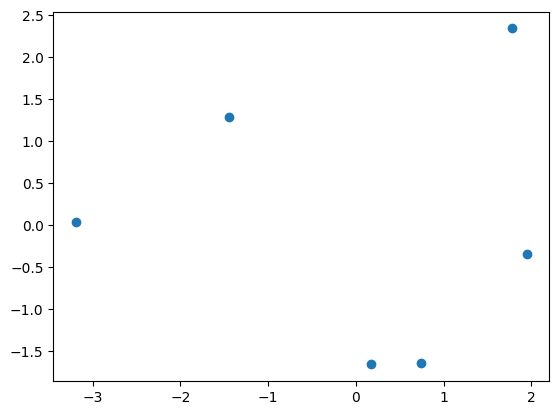

In [104]:
### Visualisation des embeddings
embeddings_weight = embedding.weight.data.numpy()
pca = PCA(n_components=2)
embeddings_pca = pca.fit_transform(embeddings_weight)


plt.scatter(embeddings_pca[:, 0], embeddings_pca[:, 1])
plt.show()


- On remarque que les modalités sont assez bien séparées dans l'espace 2D.
- On remarque que les points sont assez éloignés les uns des autres, ce qui indique que les embeddings ont réussi à capturer des différences significatives entre les modalités de la variable catégorielle.

### <span style="color:#011C5D">9. Créer votre package python </span>

    - Step 1 : Créer un fichier analyse_exploratoire.py
    - Step 2 : Copier toutes les fonctions de ce notebook dans votre fichier fichier analyse_exploratoire.py
    - Step 3 : Créer un dossier src
    - Step 4 : Deplacer votre fichier analyse_exploratoire.py dans le dossier src
    - Step 5 : Créer un nouveau notebook
    - Step 6 : Dans ce notebook, specifier le chemin vers votre dossier src
    - Step 7 : Executer 'from  analyse_exploratoire import is_outlier, display_missing_values etc...
    - Step 8 : Analyser vos données avec ces nouvelles fonction

## Ressources

Imputation:

- [Imputation Iterrative](https://scikit-learn.org/stable/auto_examples/impute/plot_iterative_imputer_variants_comparison.html) 
- [Imputation](https://scikit-learn.org/stable/modules/impute.html) 

Outliers:

- [Doc sklearn](https://scikit-learn.org/stable/modules/outlier_detection.html)
- [Doc Medium](https://towardsdatascience.com/5-outlier-detection-methods-that-every-data-enthusiast-must-know-f917bf439210)